In [67]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

Connection to Sql

In [68]:
import pyodbc
import pandas as pd
import numpy as np
connection = pyodbc.connect(driver = '{ODBC Driver 17 for SQL Server}',
                           host = 'MEHRAN',
                           database = "titanic",
                           trusted_connection = 'yes')
sqlQuery = " select * from dbo.train4 "
titanic= pd.read_sql(sql= sqlQuery, con = connection)
titanic.head(10)

C:\Users\mehran\AppData\Local\Temp\ipykernel_8112\1343572368.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  titanic= pd.read_sql(sql= sqlQuery, con = connection)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,None,S
5,6,0,3,Moran Mr James,male,NaN,0,0,330877,8.4583,None,Q
6,7,0,1,McCarthy Mr Timothy J,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Palsson Master Gosta Leonard,male,2.0,3,1,349909,21.0750,None,S
8,9,1,3,Johnson Mrs Oscar W Elisabeth Vilhelmina Berg,female,27.0,0,2,347742,11.1333,None,S
9,10,1,2,Nasser Mrs Nicholas Adele Achem,female,14.0,1,0,237736,30.0708,None,C


Dropping  columns

In [69]:
# Dropping the specified columns
titanic.drop(['Ticket', 'Name','Cabin', 'PassengerId'], axis=1, inplace=True)
# Displaying the first 10 rows of the modified dataset
titanic.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Replacing Missing values

In [70]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Step 1: Identifying missing values
print("Missing values before imputation:\n", titanic.isnull().sum())

# Step 2: Impute missing values in 'Age' using IterativeImputer
titanic_imputed = IterativeImputer(max_iter=10, random_state=0)
titanic[['Age']] = titanic_imputed.fit_transform(titanic[['Age']])
titanic = titanic.dropna(subset=['Embarked'])
titanic = titanic.dropna(subset=['Fare'])
# Step 3: Verifying missing values after imputation
print("\nMissing values after imputation:\n", titanic.isnull().sum())

titanic['Sex'] = titanic['Sex'].map({'male  ': 0, 'female': 1}).astype(int)  # Converting 'Sex' to numerical
titanic['Embarked'] = titanic['Embarked'].map({'S': 1, 'C': 2, 'Q': 3 }).astype(int)


# Display the first 10 rows of the imputed dataset
titanic.head(10)


Missing values before imputation:
 Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Missing values after imputation:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
1,1,1,1,38.000000,1,0,71.2833,2
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,1
5,0,3,0,29.881138,0,0,8.4583,3
6,0,1,0,54.000000,0,0,51.8625,1
7,0,3,0,2.000000,3,1,21.0750,1
8,1,3,1,27.000000,0,2,11.1333,1
9,1,2,1,14.000000,1,0,30.0708,2


Histogram

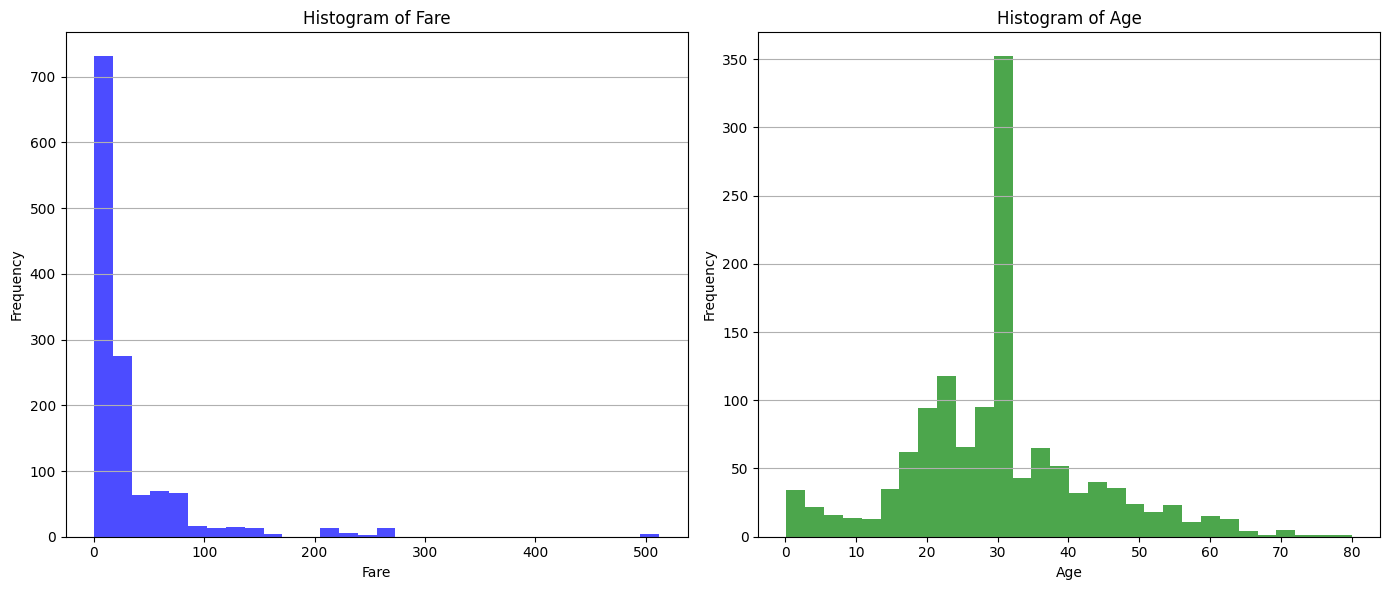

In [71]:
import matplotlib.pyplot as plt
# Set up the subplots
plt.figure(figsize=(14, 6))

# Histogram for Fare
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(titanic['Fare'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Histogram for Age
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(titanic['Age'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Show the plots
plt.tight_layout()
plt.show()

Normalization

In [72]:
from sklearn.preprocessing import MinMaxScaler  # or StandardScaler for Z-score normalization
import seaborn as sns

# Perform log normalization on the 'Fare' column
titanic['Fare'] = np.log1p(titanic['Fare'])

# Normalize 'Age'  using Min-Max Scaling
scaler = MinMaxScaler()
titanic[['Age']] = scaler.fit_transform(titanic[['Age']])
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,0.273456,1,0,2.110213,1
1,1,1,1,0.473882,1,0,4.280593,2
2,1,3,1,0.323563,0,0,2.188856,1
3,1,1,1,0.436302,1,0,3.990834,1
4,0,3,0,0.436302,0,0,2.202765,1
...,...,...,...,...,...,...,...,...
1304,0,3,0,0.372180,0,0,2.202765,1
1305,1,1,1,0.486409,0,0,4.699571,2
1306,0,3,0,0.480145,0,0,2.110213,1
1307,0,3,0,0.372180,0,0,2.202765,1


Heat Map

<Axes: >

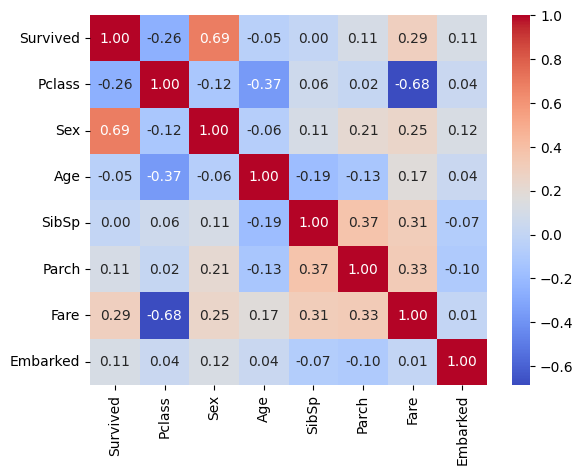

In [73]:
corr = titanic.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

LogisticRegression

In [63]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Define features and target variable
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic['Survived']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Display results
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.87
Confusion Matrix:
 [[156  20]
 [ 15  71]]


In [64]:
# Extracting True Negatives, False Positives, False Negatives, and True Positives from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Sensitivity (Recall/True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Sensitivity: 0.83
Specificity: 0.89


Draw table in Sql Server

In [21]:
import pyodbc

# Step 1: Create the new table in SQL Server
# Creating the new table in SQL Server with additional columns for predictions and performance labels
create_table_query = """
CREATE TABLE dbo.TestResults (
    Pclass INT,
    Sex INT,
    Age FLOAT,
    Fare FLOAT,
    SibSp INT,
    Parch INT,
    Survived INT,
    Prediction INT,
    PerformanceLabel NVARCHAR(10)
)
"""

# Executing the query to create the table
cursor = connection.cursor()
cursor.execute(create_table_query)
connection.commit()

# Step 2: Prepare the data for insertion
# Generate predictions and performance labels
predictions = y_pred
performance_labels = []

# Confusion Matrix components
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# Map predictions to TN, TP, FN, FP based on comparison of y_test and y_pred
for actual, predicted in zip(y_test, y_pred):
    if actual == 1 and predicted == 1:
        performance_labels.append('TP')
    elif actual == 0 and predicted == 0:
        performance_labels.append('TN')
    elif actual == 1 and predicted == 0:
        performance_labels.append('FN')
    elif actual == 0 and predicted == 1:
        performance_labels.append('FP')

# Convert the test data into a DataFrame for easier manipulation
test_data_with_predictions = X_test.copy()
test_data_with_predictions['Survived'] = y_test.values
test_data_with_predictions['Prediction'] = predictions
test_data_with_predictions['PerformanceLabel'] = performance_labels

# Step 3: Insert the test data and predictions into the new SQL table
for index, row in test_data_with_predictions.iterrows():
    insert_query = f"""
    INSERT INTO dbo.TestResults (Pclass, Sex, Age, Fare, SibSp, Parch, Survived, Prediction, PerformanceLabel)
    VALUES ({row['Pclass']}, {row['Sex']}, {row['Age']}, {row['Fare']}, {row['SibSp']}, {row['Parch']}, {row['Survived']}, {row['Prediction']}, '{row['PerformanceLabel']}')
    """
    cursor.execute(insert_query)

# Commit the transaction
connection.commit()

print("Test data with predictions and performance labels inserted successfully.")


Test data with predictions and performance labels inserted successfully.


In [8]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")


Decision Tree Regressor Accuracy Iin MAXDEPTH=2: 0.86

Confusion Matrix:
 [[219  21]
 [ 34 118]]
Sensitivity: 0.78
Specificity: 0.91


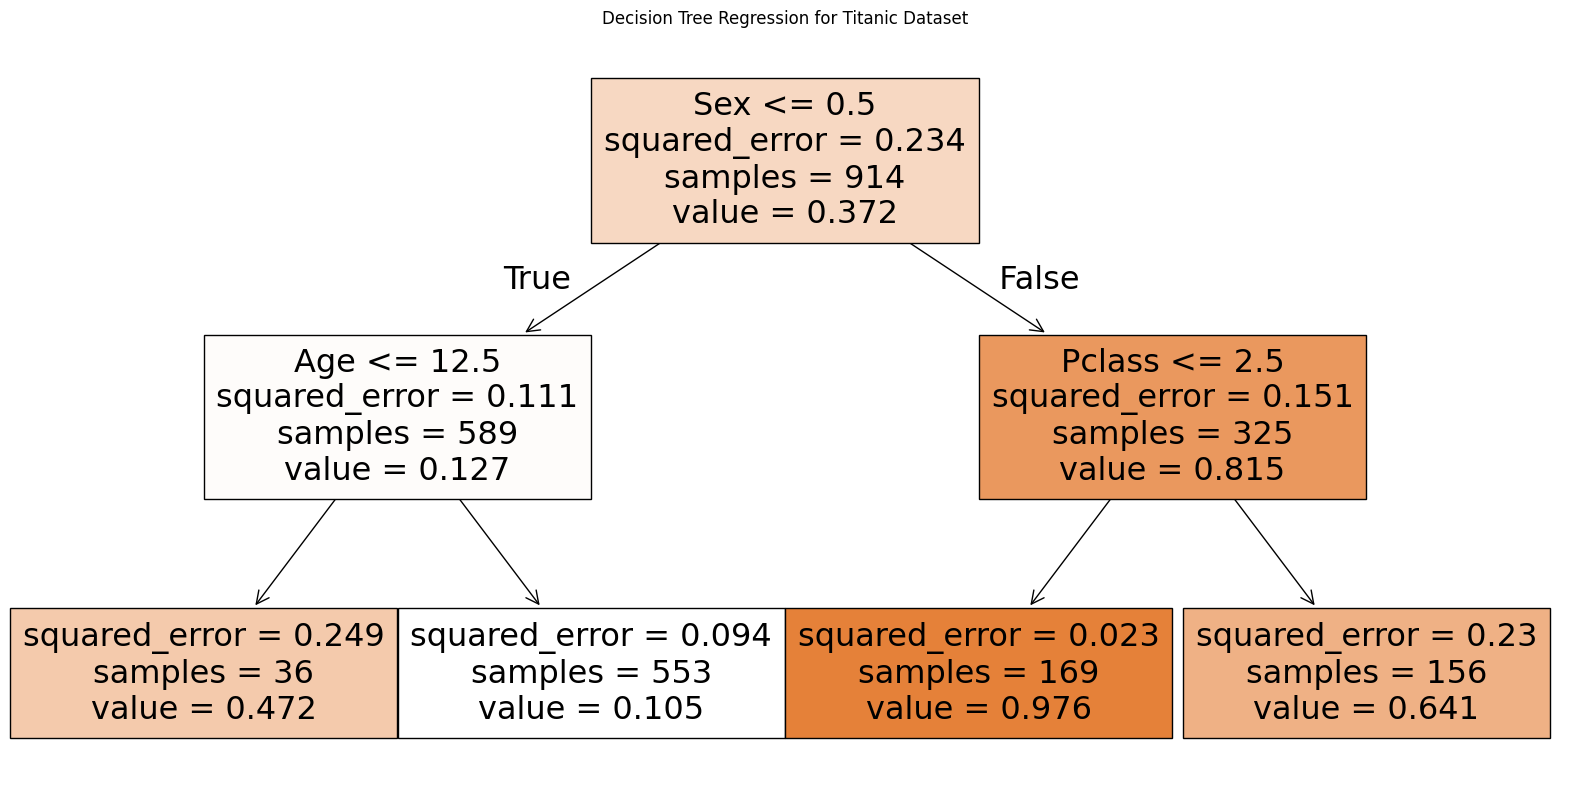

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
import matplotlib.pyplot as plt



# Drop the specified columns



# Split the data into features and target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_reg.predict(X_test)

# Convert predictions to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculate classification report
class_report = classification_report(y_test, y_pred_binary)

# Print the results
print(f"\nDecision Tree Regressor Accuracy Iin MAXDEPTH=2: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)

# Extracting True Negatives, False Positives, False Negatives, and True Positives from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Sensitivity (Recall/True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')



# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree_reg, feature_names=X.columns, filled=True)
plt.title('Decision Tree Regression for Titanic Dataset')
plt.show()






Decision Tree Regressor Accuracy in MAXDEPTH=4: 0.89

Confusion Matrix:
 [[147  11]
 [ 17  87]]
Sensitivity: 0.84
Specificity: 0.93


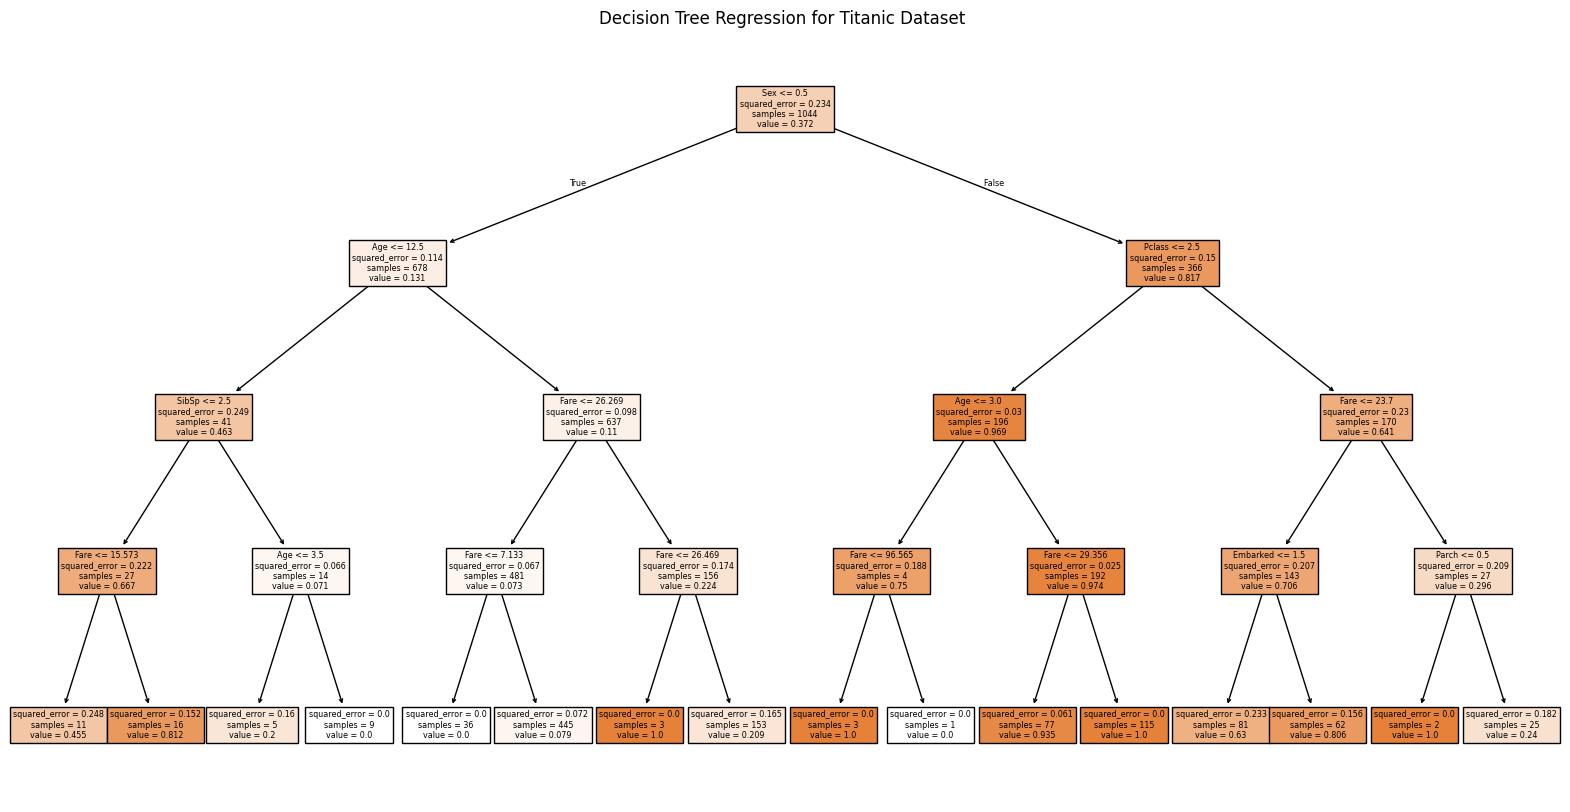

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
import matplotlib.pyplot as plt



# Drop the specified columns



# Split the data into features and target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_reg.predict(X_test)

# Convert predictions to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculate classification report
class_report = classification_report(y_test, y_pred_binary)

# Print the results
print(f"\nDecision Tree Regressor Accuracy in MAXDEPTH=4: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)

# Extracting True Negatives, False Positives, False Negatives, and True Positives from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Sensitivity (Recall/True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')



# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree_reg, feature_names=X.columns, filled=True)
plt.title('Decision Tree Regression for Titanic Dataset ')
plt.show()






Decision Tree Regressor Accuracy: 0.80

Confusion Matrix:
 [[203  37]
 [ 42 110]]
Sensitivity: 0.72
Specificity: 0.85


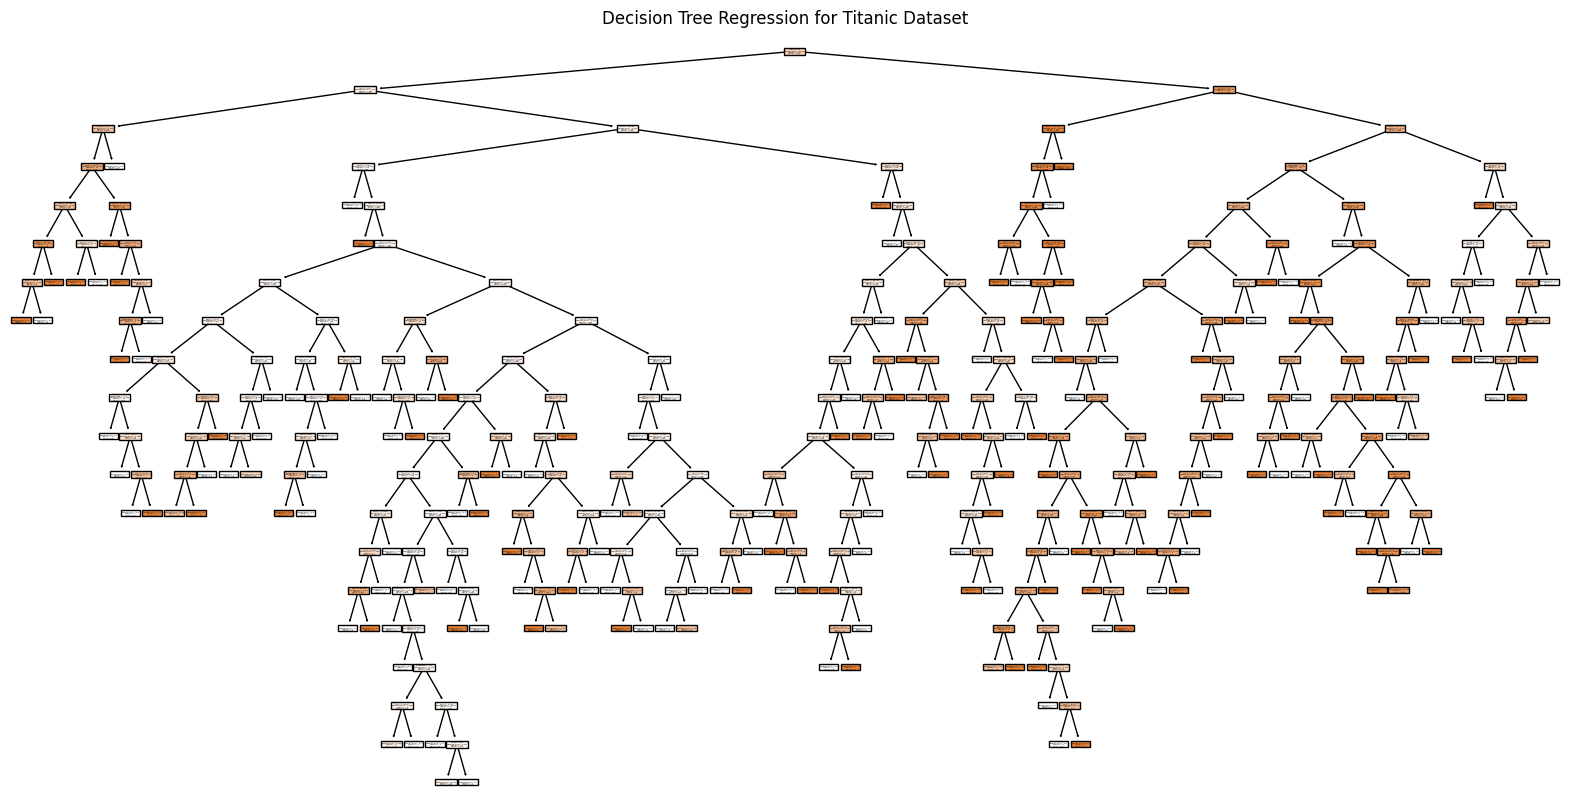

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
import matplotlib.pyplot as plt



# Drop the specified columns



# Split the data into features and target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_reg.predict(X_test)

# Convert predictions to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculate classification report
class_report = classification_report(y_test, y_pred_binary)

# Print the results
print(f"\nDecision Tree Regressor Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)

# Extracting True Negatives, False Positives, False Negatives, and True Positives from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Sensitivity (Recall/True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')



# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree_reg, feature_names=X.columns, filled=True)
plt.title('Decision Tree Regression for Titanic Dataset')
plt.show()



